## Implementation of Text Pre-processing using Neural Networks

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('amazon.txt', names=['sentence', 'label'], sep='\t')
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
df.tail()

,sentence,label
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [5]:
sentences = ['Rashmi likes ice cream', 'Rashmi hates chocolate.']

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'Rashmi': 0, 'likes': 5, 'ice': 4, 'cream': 2, 'hates': 3, 'chocolate': 1}

In [6]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]], dtype=int64)

In [9]:
sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [11]:
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [12]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


In [14]:
input_dim = X_train.shape[1]  

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                15470     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,481
Trainable params: 15,481
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/100


C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


75/75 [==============================] - 1s 2ms/step - loss: 0.6796 - accuracy: 0.6320 - val_loss: 0.6610 - val_accuracy: 0.7000
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.8480 - val_loss: 0.6063 - val_accuracy: 0.7640
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.5019 - accuracy: 0.9227 - val_loss: 0.5501 - val_accuracy: 0.7800
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.9493 - val_loss: 0.5030 - val_accuracy: 0.7760
Epoch 5/100
75/75 [==============================] - 0s 784us/step - loss: 0.3083 - accuracy: 0.9667 - val_loss: 0.4717 - val_accuracy: 0.7800
Epoch 6/100
75/75 [==============================] - 0s 726us/step - loss: 0.2411 - accuracy: 0.9787 - val_loss: 0.4526 - val_accuracy: 0.7840
Epoch 7/100
75/75 [==============================] - 0s 744us/step - loss: 0.1898 - accuracy: 0.9853 - val_loss: 0.4380 - val_accuracy: 0.7960
Epoch 8/100
75/75 [

In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7960


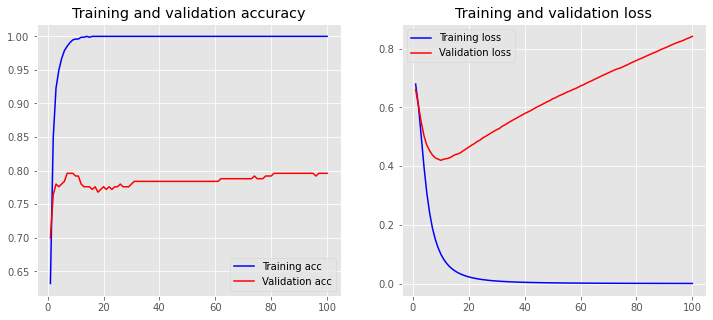

In [19]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)